<a href="https://colab.research.google.com/github/Anu200307/loan_approval_prediction/blob/main/loan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN APPROVAL PREDICTION

**Data Load**

In [ ]:
#!pip install joblib

In [ ]:
#!pip uninstall scikit-learn

In [ ]:
#!pip install scikit-learn==1.2.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score
my_kfold=KFold(n_splits=5)

In [ ]:
data=pd.read_csv("/content/loan.csv")
data=data.dropna(how='any',inplace=False)
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [ ]:
data=data.drop(["Loan_ID","CoapplicantIncome","Education","Gender","Married","Dependents"],axis=1)
print(data)

    Self_Employed  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
1              No             4583       128.0             360.0   
2             Yes             3000        66.0             360.0   
3              No             2583       120.0             360.0   
4              No             6000       141.0             360.0   
5             Yes             5417       267.0             360.0   
..            ...              ...         ...               ...   
609            No             2900        71.0             360.0   
610            No             4106        40.0             180.0   
611            No             8072       253.0             360.0   
612            No             7583       187.0             360.0   
613           Yes             4583       133.0             360.0   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban      

<Axes: >

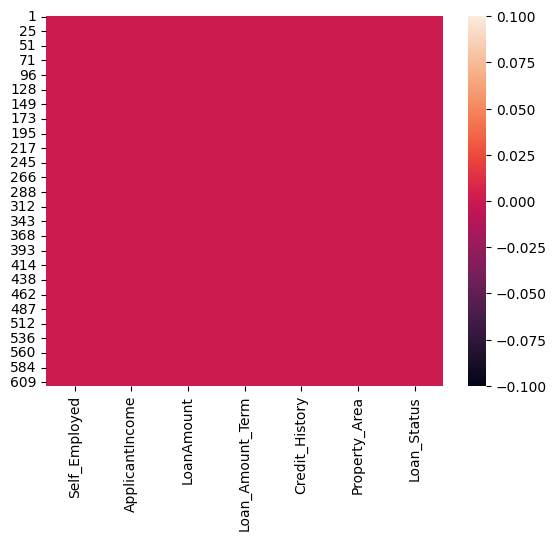

In [ ]:
sns.heatmap(data.isnull())

<Axes: xlabel='Self_Employed', ylabel='count'>

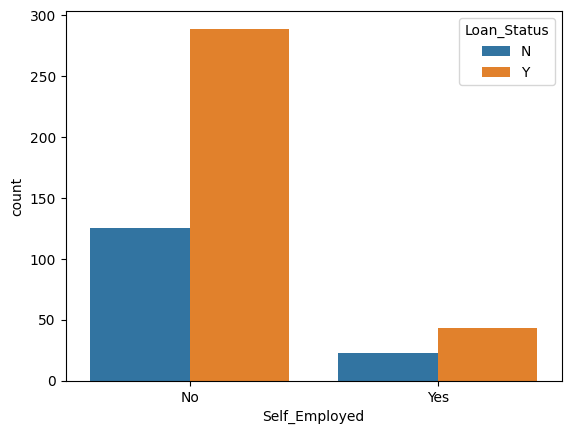

In [ ]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

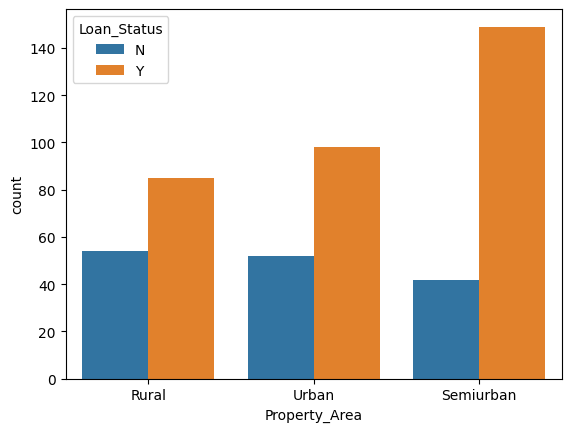

In [ ]:
sns.countplot(x='Property_Area',data=data,hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='count'>

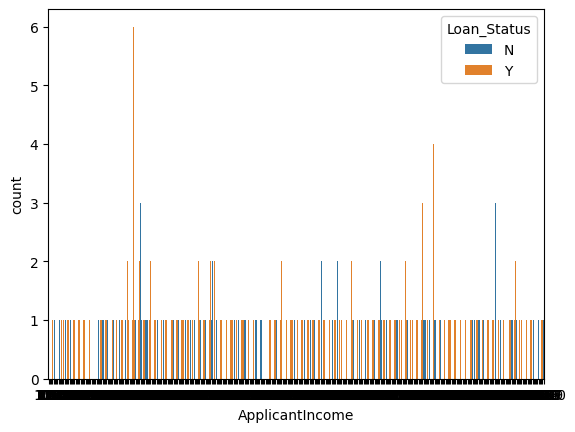

In [ ]:
sns.countplot(x='ApplicantIncome',data=data,hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

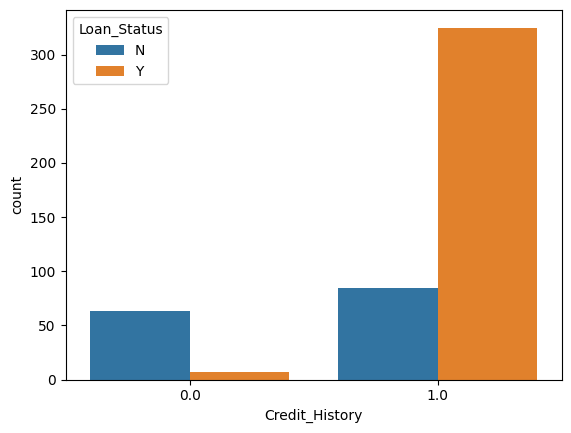

In [ ]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

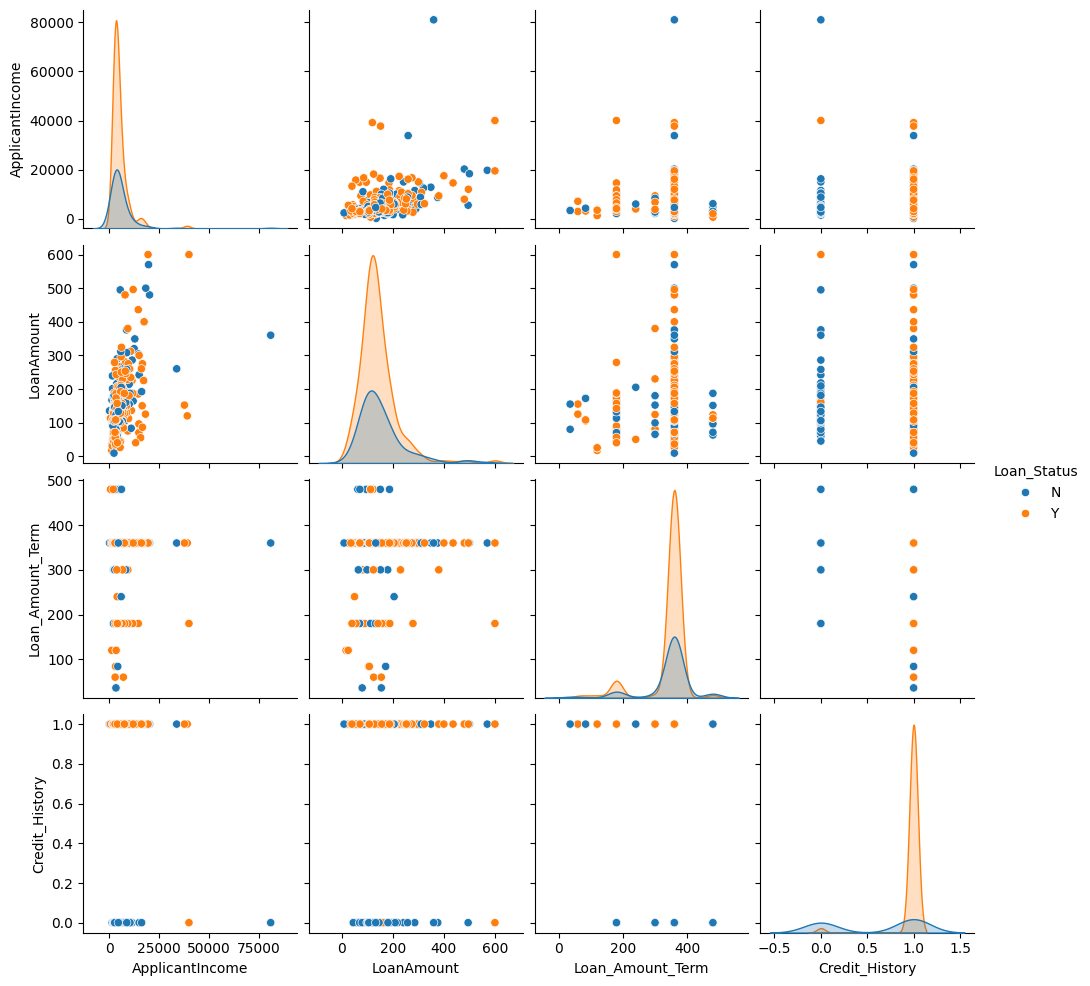

In [ ]:
sns.pairplot(data,hue='Loan_Status')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
print(data)

     Self_Employed  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
1                0             4583       128.0             360.0   
2                1             3000        66.0             360.0   
3                0             2583       120.0             360.0   
4                0             6000       141.0             360.0   
5                1             5417       267.0             360.0   
..             ...              ...         ...               ...   
609              0             2900        71.0             360.0   
610              0             4106        40.0             180.0   
611              0             8072       253.0             360.0   
612              0             7583       187.0             360.0   
613              1             4583       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
1               1.0              0            0  
2               1.0              2            1  
3               1.0  

**data split to dependent and independent**

In [ ]:
y=data.iloc[:,0].values
x=data.iloc[:,1:].values
print(x)

[[4.583e+03 1.280e+02 3.600e+02 1.000e+00 0.000e+00 0.000e+00]
 [3.000e+03 6.600e+01 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 [2.583e+03 1.200e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 ...
 [8.072e+03 2.530e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 [7.583e+03 1.870e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 [4.583e+03 1.330e+02 3.600e+02 0.000e+00 1.000e+00 0.000e+00]]


**Data Sampling**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[[3.095e+03 1.130e+02 3.600e+02 1.000e+00 0.000e+00 1.000e+00]
 [2.378e+03 4.600e+01 3.600e+02 1.000e+00 0.000e+00 0.000e+00]
 [4.666e+03 1.350e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 ...
 [9.166e+03 2.440e+02 3.600e+02 1.000e+00 2.000e+00 0.000e+00]
 [2.500e+03 1.200e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
 [2.221e+03 6.000e+01 3.600e+02 0.000e+00 2.000e+00 0.000e+00]]


# **KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
inp=[[1,3000,128,280,0,2]]
yp=knn.predict(inp)
print(yp)

[0]


1=Self_Employed,3000=ApplicantIncome,128= LoanAmount,280=Loan_Amount_Term,0=credit history,2=loan status

In [ ]:
myknnsc=cross_val_score(knn,x_test,y_test,cv=my_kfold)
print(myknnsc)
print("Mean of kfold"+str(myknnsc.mean()))

[0.85       0.89473684 0.84210526 0.94736842 0.78947368]
Mean of kfold0.8647368421052631


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

0.8645833333333334


<Axes: >

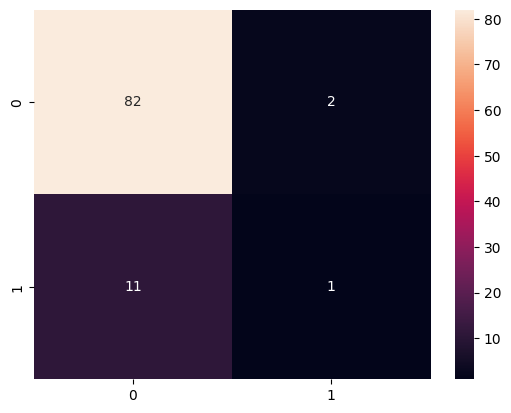

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
sns.heatmap(cm,annot=True)

# Naive-Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.84375


In [ ]:
mynbsc=cross_val_score(nb,x_test,y_test,cv=my_kfold)
print(mynbsc)
print("Mean of kfold"+str(mynbsc.mean()))

[0.85       0.89473684 0.73684211 0.84210526 0.78947368]
Mean of kfold0.8226315789473684


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.7291666666666666


In [ ]:
mydtsc=cross_val_score(dt,x_test,y_test,cv=my_kfold)
print(mydtsc)
print("Mean of kfold"+str(mydtsc.mean()))

[0.9        0.89473684 0.68421053 0.89473684 0.78947368]
Mean of kfold0.8326315789473684


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)


0.8541666666666666


In [ ]:
myrfsc=cross_val_score(rf,x_test,y_test,cv=my_kfold)
print(myrfsc)
print("Mean of kfold"+str(myrfsc.mean()))

[0.9        0.94736842 0.84210526 0.84210526 0.78947368]
Mean of kfold0.8642105263157894


# SVM Linear

In [ ]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm_model.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.875


In [ ]:
joblib.dump(svm_model,'loan_model.joblib')

['loan_model.joblib']